In [7]:
import matplotlib.pyplot as plt
import os
import torch

# Load the saved predictions file
file_path = '/home/sl221120/WildfireSpreadTS/lightning_logs/predictions_627o25ka.pt'
fire_masks_combined = torch.load(file_path)
# Extract data
x_af = fire_masks_combined[0]  # Current fire
y_hat = fire_masks_combined[1]  # Predicted next day
y = fire_masks_combined[2]  # True next day
y_binary = (y_hat > 0.5).float()



In [8]:
import torch
import matplotlib.pyplot as plt

def plot_preds(x_af, y, y_swin, num_data_points):    
    fire_pixel_counts = torch.sum(y == 1, dim=(1, 2)).cpu().numpy()

    # Get the indices of the top num_data_points with the most fire pixels
    top_indices = fire_pixel_counts.argsort()[-num_data_points:][::-1]

    # Create subplots
    fig, axs = plt.subplots(num_data_points, 3, figsize=(10, num_data_points * 3))

    # Plot each of the selected data points
    for i, idx in enumerate(top_indices):
        # Current fire (x_af)
        axs[i, 0].imshow(x_af[idx].cpu().numpy(), cmap='viridis')
        axs[i, 0].set_title('Current Fire')
        axs[i, 0].axis('off')

        # True next day (y)
        axs[i, 1].imshow(y[idx].cpu().numpy(), cmap='viridis')
        axs[i, 1].set_title('True Next Day')
        axs[i, 1].axis('off')

        # Predicted next day by SwinUnet (y_swin)
        y_swin_binary = (y_swin[idx] > 0.5).float()
        axs[i, 2].imshow(y_swin_binary.cpu().numpy(), cmap='viridis')
        axs[i, 2].set_title('Predicted Next (Swin)')
        axs[i, 2].axis('off')


    # Adjust layout
    plt.tight_layout()
    plt.show()

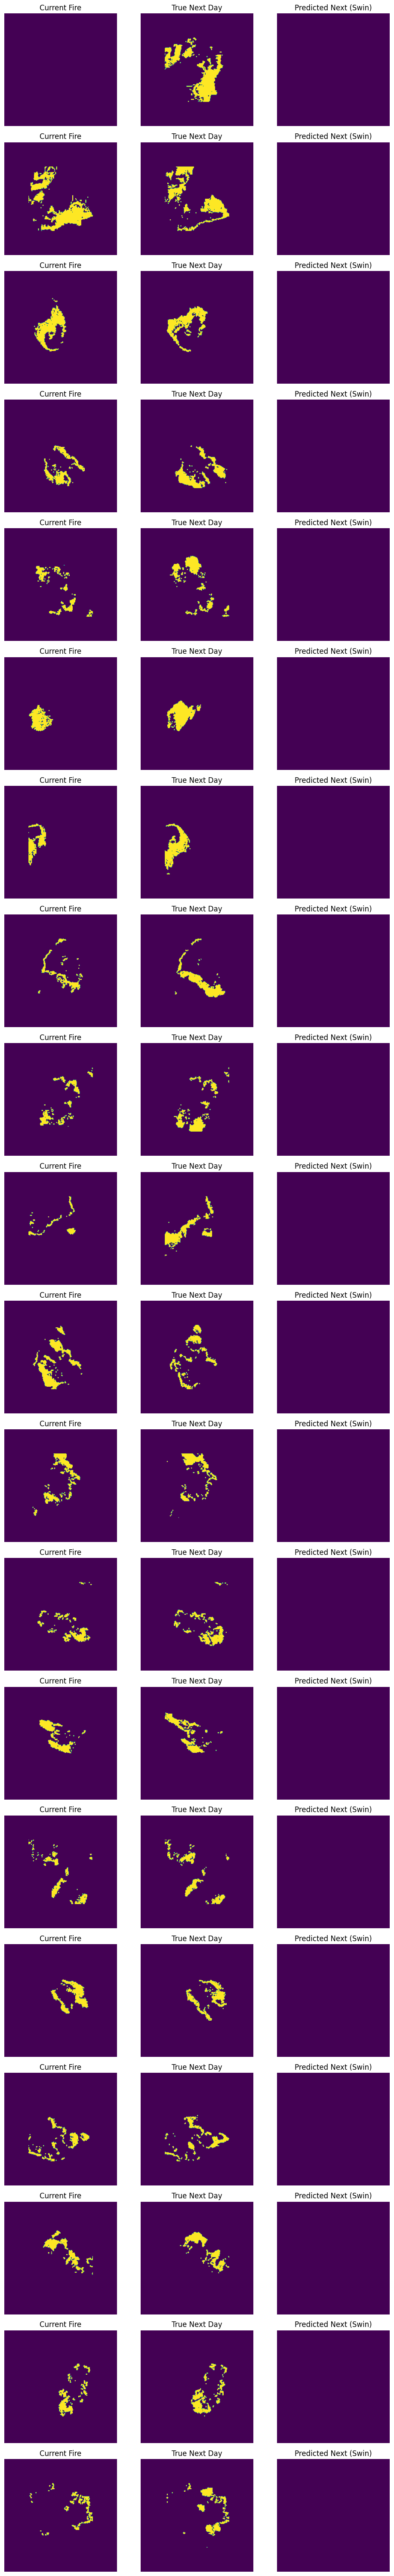

In [9]:
plot_preds(x_af, y, y_hat, num_data_points=20)


In [6]:
import torch
import matplotlib.pyplot as plt

def plot_and_save_preds(x_af, y, y_swin, num_data_points, output_dir="output_images"):
    import os
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    fire_pixel_counts = torch.sum(y == 1, dim=(1, 2)).cpu().numpy()

    # Get the indices of the top num_data_points with the most fire pixels
    top_indices = fire_pixel_counts.argsort()[-num_data_points:][::-1]

    # Plot and save each of the selected data points as a separate figure
    for i, idx in enumerate(top_indices):
        # Create a new figure for each row
        fig, axs = plt.subplots(1, 3, figsize=(10, 3))

        # Current fire (x_af)
        axs[0].imshow(x_af[idx].cpu().numpy(), cmap='viridis')
        axs[0].set_title('Current Fire')
        axs[0].axis('off')

        # True next day (y)
        axs[1].imshow(y[idx].cpu().numpy(), cmap='viridis')
        axs[1].set_title('True Next Day')
        axs[1].axis('off')

        # Predicted next day by SwinUnet (y_swin)
        y_swin_binary = (y_swin[idx] > 0.5).float()
        axs[2].imshow(y_swin_binary.cpu().numpy(), cmap='viridis')
        axs[2].set_title('Predicted Next (Swin)')
        axs[2].axis('off')

        # Save the figure to disk
        plt.tight_layout()
        fig_path = os.path.join(output_dir, f"pred_plot_{i + 1}.png")
        plt.savefig(fig_path)
        plt.close(fig)  # Close the figure to free up memory

    print(f"Saved {num_data_points} figures to {output_dir}")


In [7]:
plot_and_save_preds(x_af_cropped, y_cropped, y_hat_cropped, num_data_points=20)

Saved 20 figures to output_images


In [8]:
import torch
import matplotlib.pyplot as plt

def plot_and_save_preds_flip(x_af, y, y_swin, num_data_points, output_dir="output_images_flip"):
    import os
    # Create directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    fire_pixel_counts = torch.sum(x_af == 1, dim=(1, 2)).cpu().numpy()

    # Get the indices of the top num_data_points with the most fire pixels
    top_indices = fire_pixel_counts.argsort()[-num_data_points:][::-1]

    # Plot and save each of the selected data points as a separate figure
    for i, idx in enumerate(top_indices):
        # Create a new figure for each row
        fig, axs = plt.subplots(1, 3, figsize=(10, 3))

        # Current fire (x_af)
        axs[0].imshow(x_af[idx].cpu().numpy(), cmap='viridis')
        axs[0].set_title('Current Fire')
        axs[0].axis('off')

        # True next day (y)
        axs[1].imshow(y[idx].cpu().numpy(), cmap='viridis')
        axs[1].set_title('True Next Day')
        axs[1].axis('off')

        # Predicted next day by SwinUnet (y_swin)
        y_swin_binary = (y_swin[idx] > 0.5).float()
        axs[2].imshow(y_swin_binary.cpu().numpy(), cmap='viridis')
        axs[2].set_title('Predicted Next (Swin)')
        axs[2].axis('off')

        # Save the figure to disk
        plt.tight_layout()
        fig_path = os.path.join(output_dir, f"pred_plot_{i + 1}.png")
        plt.savefig(fig_path)
        plt.close(fig)  # Close the figure to free up memory

    print(f"Saved {num_data_points} figures to {output_dir}")


In [9]:
plot_and_save_preds_flip(x_af_cropped, y_cropped, y_hat_cropped, num_data_points=20)

Saved 20 figures to output_images_flip


In [69]:
from sklearn.metrics import average_precision_score
import torch

def compute_mean_ap(y_true, y_swin, y_unet):
    # Flatten the tensors to 1D arrays
    y_true_flat = y_true.cpu().numpy().flatten()
    y_swin_flat = y_swin.cpu().numpy().flatten()
    y_unet_flat = y_unet.cpu().numpy().flatten()

    # Compute mean average precision for SwinUnet
    ap_swin = average_precision_score(y_true_flat, y_swin_flat)

    # Compute mean average precision for UNet
    ap_unet = average_precision_score(y_true_flat, y_unet_flat)

    # Print both results
    print(f"Mean Average Precision (SwinUnet): {ap_swin:.4f}")
    print(f"Mean Average Precision (UNet): {ap_unet:.4f}")

    return ap_swin, ap_unet

# Example usage:
compute_mean_ap(y, swin_y_hat_swin, y_hat)


Mean Average Precision (SwinUnet): 0.4725
Mean Average Precision (UNet): 0.4725


(0.4724991083266338, 0.4724991083266338)

In [13]:
from sklearn.metrics import average_precision_score
import torch

def compute_mean_ap(y_true, y_swin):
    # Flatten the tensors to 1D arrays
    y_true_flat = y_true.cpu().numpy().flatten()
    y_swin_flat = y_swin.cpu().numpy().flatten()

    # Compute mean average precision for SwinUnet
    ap_swin = average_precision_score(y_true_flat, y_swin_flat)

    return ap_swin

def filter_images_by_fire_percentage(images, threshold):
    """
    Filters the images based on the percentage of fire pixels.

    Args:
        images (Tensor): Batch of images to filter.
        threshold (float): Percentage threshold (between 0 and 100).

    Returns:
        indices (Tensor): Boolean tensor with indices of images that meet the threshold.
    """
    # Compute the number of fire pixels for each image (fire pixels are assumed to be non-zero)
    fire_pixels = (images > 0).float().sum(dim=(1, 2))  # Assuming 1xHxW tensor for each image
    total_pixels = images.shape[1] * images.shape[2]
    
    # Compute the percentage of fire pixels
    fire_percentage = (fire_pixels / total_pixels) * 100

    # Return a boolean mask of images with fire percentage >= threshold
    return fire_percentage >= threshold

def compute_test_ap_for_subsets(x_af, y_true, y_swin, thresholds):
    results = {}

    for z in thresholds:
        print(f"\nComputing mAP for threshold {z}% of fire pixels:")

        # Subset 1: Where `x_af` (current fire image) has at least Z% fire pixels
        x_af_mask = filter_images_by_fire_percentage(x_af, z)
        y_true_filtered_x_af = y_true[x_af_mask]
        y_swin_filtered_x_af = y_swin[x_af_mask]

        # Compute mAP for SwinUnet and UNet for this subset
        ap_swin_x_af = compute_mean_ap(y_true_filtered_x_af, y_swin_filtered_x_af)
        results[f"x_af >= {z}%"] = {"SwinUnet": ap_swin_x_af}

        print(f"Subset where x_af >= {z}% fire pixels: AP(SwinUnet) = {ap_swin_x_af:.4f}")

        # Subset 2: Where `y_true` (next day image) has at least Z% fire pixels
        y_true_mask = filter_images_by_fire_percentage(y_true, z)
        y_true_filtered_y = y_true[y_true_mask]
        y_swin_filtered_y = y_swin[y_true_mask]

        # Compute mAP for SwinUnet and UNet for this subset
        ap_swin_y = compute_mean_ap(y_true_filtered_y, y_swin_filtered_y)
        results[f"y_true >= {z}%"] = {"SwinUnet": ap_swin_y}

        print(f"Subset where y_true >= {z}% fire pixels: AP(SwinUnet) = {ap_swin_y:.4f}")
    
    return results

# Example usage:
# Assuming x_af, y_true, swin_y_hat_swin, and y_hat are your tensors
thresholds = [5, 10, 15, 20, 25, 30, 40, 50, 75]
results = compute_test_ap_for_subsets(x_af_cropped, y_cropped, y_hat_cropped, thresholds)

# `results` will hold the mAP values for each threshold level and subset



Computing mAP for threshold 5% of fire pixels:
Subset where x_af >= 5% fire pixels: AP(SwinUnet) = 0.5955
Subset where y_true >= 5% fire pixels: AP(SwinUnet) = 0.5409

Computing mAP for threshold 10% of fire pixels:
Subset where x_af >= 10% fire pixels: AP(SwinUnet) = 0.5779
Subset where y_true >= 10% fire pixels: AP(SwinUnet) = 0.5243

Computing mAP for threshold 15% of fire pixels:
Subset where x_af >= 15% fire pixels: AP(SwinUnet) = 0.6171
Subset where y_true >= 15% fire pixels: AP(SwinUnet) = 0.4875

Computing mAP for threshold 20% of fire pixels:
Subset where x_af >= 20% fire pixels: AP(SwinUnet) = 0.5776
Subset where y_true >= 20% fire pixels: AP(SwinUnet) = 0.4762

Computing mAP for threshold 25% of fire pixels:
Subset where x_af >= 25% fire pixels: AP(SwinUnet) = 0.6044
Subset where y_true >= 25% fire pixels: AP(SwinUnet) = 0.4509

Computing mAP for threshold 30% of fire pixels:
Subset where x_af >= 30% fire pixels: AP(SwinUnet) = 0.5975
Subset where y_true >= 30% fire pixels:

IndexError: cannot do a non-empty take from an empty axes.

In [59]:
# Unet predictions
file_path = '/home/sl221120/WildfireSpreadTS/lightning_logs/predictions_zg3xkq8k.pt'
unet_fire_masks_combined = torch.load(file_path)
y_unet = unet_fire_masks_combined[1]

# SwinUnet predictions
file = "/home/sl221120/WildfireSpreadTS/prediction_output.pt"
swin_prediction_output = torch.load(file)
y_swin = torch.cat(list(map(lambda tup: tup[2], swin_prediction_output)), axis=0)

